In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [ ]:
train_data = datasets.EMNIST(root= 'data' , train = True , download = True , transform=ToTensor() ,split="balanced" )
test_data = datasets.EMNIST(root= 'data' , train = False , download = True , transform=ToTensor()  ,split="balanced")

100%|██████████| 562M/562M [00:04<00:00, 131MB/s]


In [ ]:
img , label = train_data[100]
img.shape
print(label)
print(img)

33
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0784, 0.1412, 0.0784, 0.0039,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0275, 0.1294, 0.6196, 0.83

In [ ]:
print(len(train_data))
print(len(test_data))

112800
18800


In [ ]:
class_names = train_data.classes
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

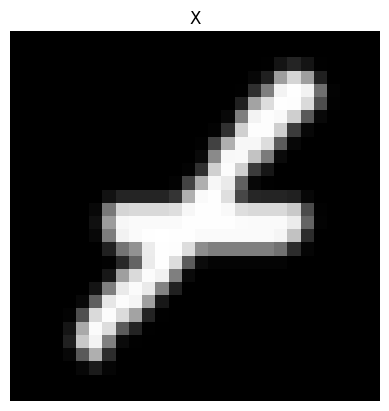

In [ ]:
plt.imshow(img.squeeze(),cmap='gray')
print(img.shape)
plt.title(class_names[label])
plt.axis(False)

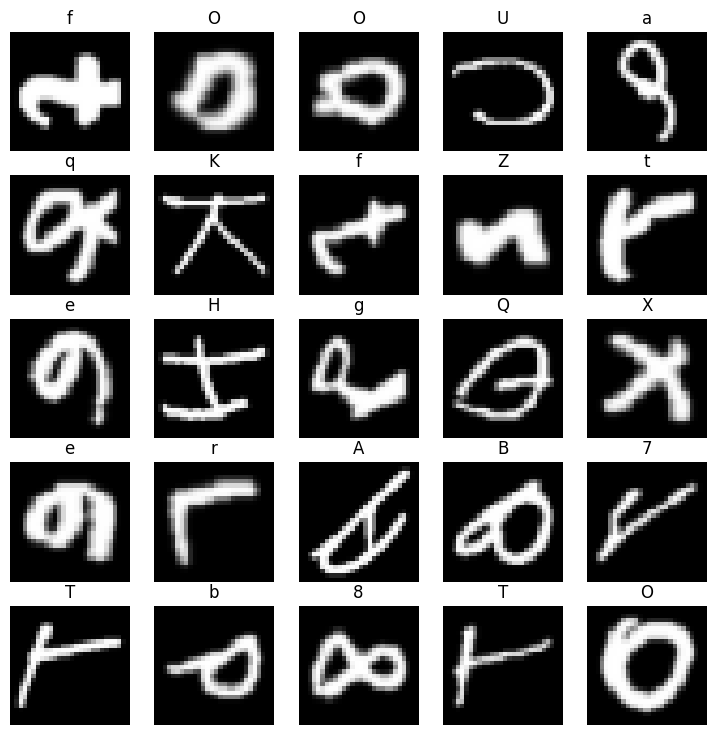

In [ ]:
torch.manual_seed(42)
rows , cols = 5 , 5
fig = plt.figure(figsize=(9,9))
for i in range(1 , rows*cols +1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img , label = train_data[sample_idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.axis(False)
  plt.title(class_names[label])

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data , batch_size=BATCH_SIZE , shuffle=True )
test_dataloader = DataLoader(test_data , batch_size=BATCH_SIZE , shuffle=False )
print(f'length of train dataloader : {len(train_dataloader)}')
print(f'length of test dataloader : {len(test_dataloader)}')

length of train dataloader : 3525
length of test dataloader : 588


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
print(f'Shape before flattening: {x.shape}')
x = flatten_model(x)
print(f'Shape after flattening: {x.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
import torch
from torch import nn

class EMNISTclassificationV0(nn.Module):
    def __init__(self, in_f: int, hidden_layer: int, out_f: int):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_f, out_features=hidden_layer),
            nn.Linear(in_features=hidden_layer, out_features=out_f)
        )

    def forward(self, x):
        return self.stack_layer(x)



In [ ]:
torch.manual_seed(42)
model_0 = EMNISTclassificationV0(784 , 10 , len(class_names))
model_0.to('cpu')

EMNISTclassificationV0(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=47, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer

In [ ]:
def print_train_time(start: float , end:float , device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 1
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        # Training mode
        model_0.train()

        # 1. Forward pass
        y_train_predict = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_train_predict, y)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print progress
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Average train loss per batch
    train_loss /= len(train_dataloader)

    # Evaluation mode
    model_0.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(
                y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        # Average metrics per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print epoch results
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)



  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/112800 samples
Looked at 12800/112800 samples
Looked at 25600/112800 samples
Looked at 38400/112800 samples
Looked at 51200/112800 samples
Looked at 64000/112800 samples
Looked at 76800/112800 samples
Looked at 89600/112800 samples
Looked at 102400/112800 samples

Train loss: 1.63393 | Test loss: 1.44834, Test acc: 59.09%

Train time on cpu: 17.321 seconds


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def model_acc(loss_fn, acc_fn, model, dataloader):
    model.eval()
    total_loss, total_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            y_predict = model(X)
            loss_1 = loss_fn(y_predict, y)
            acc_1 = acc_fn(y, y_predict.argmax(dim=1))

            total_loss += loss_1.item()
            total_acc += acc_1

    avg_loss = total_loss / len(dataloader)
    avg_acc = total_acc / len(dataloader)

    print(f"Model name: {model.__class__.__name__}\nAccuracy: {avg_acc:.4f}\nLoss: {avg_loss:.4f}")

    return avg_loss, avg_acc


In [ ]:
class EMNISTclassificationV1(nn.Module):
  def __init__(self, input_shape:int, hidden_layer:int , output_shape:int) -> None:
     super().__init__()
     self.stack_layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=input_shape , out_features=hidden_layer),
         nn.ReLU(),
         nn.Linear(in_features=hidden_layer , out_features=output_shape),
         nn.ReLU()
     )
  def forward(self , x):
    return self.stack_layer(x)

In [ ]:
model_1 = EMNISTclassificationV1(784,10,len(class_names)).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1
for epoch in range(epochs):
    train_loss, train_acc = 0, 0

    # --- Training ---
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_1.train()
        y_pred = model_1(X)
        loss = loss_fn(y_pred, y)
        acc = accuracy_fn(y, y_pred.argmax(dim=1))

        train_loss += loss.item()  # .item() برای جمع عددی
        train_acc += acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"{batch*len(X)}/{len(train_dataloader.dataset)} samples processed")

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # --- Testing ---
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            y_test_pred = model_1(X)
            loss_1 = loss_fn(y_test_pred, y)
            acc_1 = accuracy_fn(y, y_test_pred.argmax(dim=1))

            test_loss += loss_1.item()
            test_acc += acc_1

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # --- Print results ---
    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}\n")



0/112800 samples processed
12800/112800 samples processed
25600/112800 samples processed
38400/112800 samples processed
51200/112800 samples processed
64000/112800 samples processed
76800/112800 samples processed
89600/112800 samples processed
102400/112800 samples processed

Epoch 1/1
Train loss: 2.26241 | Train acc: 44.52
Test loss: 1.94953 | Test acc: 52.15



In [ ]:
def train_step (dataloader:torch.utils.data.DataLoader ,  optimizer:torch.optim.Optimizer , model: torch.nn.Module , loss_function: torch.nn.Module , accuracy_function, device: torch.device = device):
  train_loss , train_acc = 0,0
  model.train()
  for batch , (X,y) in enumerate(dataloader):
    X , y = X.to(device) , y.to(device)
    y_pred = model(X)
    loss = loss_function(y_pred , y)
    acc = accuracy_function(y , y_pred.argmax(dim=1))
    train_loss += loss
    train_acc += acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
            print(f"{batch*len(X)}/{len(train_dataloader.dataset)} samples processed")
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

In [ ]:
def test_step(dataloader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_function: torch.nn.Module,
              accuracy_function,
              device: torch.device = device):

    model.eval()
    loss_test, acc_test = 0.0, 0.0

    with torch.inference_mode():  # ⚡ inference mode
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_function(y_pred, y).item()  # ⚡ به float تبدیل شد
            acc = accuracy_function(y, y_pred.argmax(dim=1))  # ⚡ فرض بر این که float است

            loss_test += loss
            acc_test += acc

    # میانگین
    loss_test /= len(dataloader)
    acc_test /= len(dataloader)

    print(f"Test loss: {loss_test:.5f} | Test acc: {acc_test:.2f}")



In [ ]:
def model_eval(dataloader: torch.utils.data.DataLoader,
               model: torch.nn.Module,
               loss_function: torch.nn.Module,
               accuracy_function,
               device: torch.device = device):

    model.eval()
    loss_test, acc_test = 0.0, 0.0

    with torch.inference_mode():  # ⚡ inference mode
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_function(y_pred, y).item()          # ⚡ تبدیل به float
            acc = accuracy_function(y_pred.argmax(dim=1), y)
            if not isinstance(acc, float):
                acc = acc.item()                             # ⚡ تبدیل به float در صورت نیاز

            loss_test += loss
            acc_test += acc

    # میانگین
    loss_test /= len(dataloader)
    acc_test /= len(dataloader)
    return  {'model_name': model.__class__.__name__,
               'model_loss': loss_test,
               'model_acc': acc_test}


In [ ]:
import torch
from torch import nn

class EMNISTclassificationV3(nn.Module):
    def __init__(self, input_num: int = 1, hidden_layer: int = 10, output_num: int = 47):
        super().__init__()


        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=input_num, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer*2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer*2, out_channels=hidden_layer*2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(hidden_layer*2) * 7 * 7, out_features=output_num)
        )

    def forward(self, x):
        x = self.conv_layer1(x)
        # print("After conv1:", x.shape)
        x = self.conv_layer2(x)
        # print("After conv2:", x.shape)
        x = self.classifier(x)
        return x


In [ ]:
torch.manual_seed(42)
model_2 = EMNISTclassificationV3(input_num=1 , hidden_layer= 10 , output_num=len(class_names)).to(device)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
start_train_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}')
  train_step(optimizer=optimizer , model=model_2 , dataloader=train_dataloader , accuracy_function=accuracy_fn , loss_function=loss_fn , device=device)
  test_step(model = model_2 , loss_function=loss_fn , dataloader= test_dataloader,device=device , accuracy_function=accuracy_fn)
end_train_time= timer()
print_train_time(start=start_train_time , end = end_train_time , device=device )

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
0/112800 samples processed
12800/112800 samples processed
25600/112800 samples processed
38400/112800 samples processed
51200/112800 samples processed
64000/112800 samples processed
76800/112800 samples processed
89600/112800 samples processed
102400/112800 samples processed
Train loss: 0.81536 | Train acc: 75.91
Test loss: 0.49478 | Test acc: 84.03
epoch: 1
0/112800 samples processed
12800/112800 samples processed
25600/112800 samples processed
38400/112800 samples processed
51200/112800 samples processed
64000/112800 samples processed
76800/112800 samples processed
89600/112800 samples processed
102400/112800 samples processed
Train loss: 0.44296 | Train acc: 85.16
Test loss: 0.44080 | Test acc: 85.19
epoch: 2
0/112800 samples processed
12800/112800 samples processed
25600/112800 samples processed
38400/112800 samples processed
51200/112800 samples processed
64000/112800 samples processed
76800/112800 samples processed
89600/112800 samples processed
102400/112800 samples pro

73.43520070799997

In [ ]:
model_res =model_eval(dataloader=test_dataloader,model=model_2 , accuracy_function= accuracy_fn , loss_function=loss_fn , device = device)
model_res

{'model_name': 'EMNISTclassificationV3',
 'model_loss': 0.42669169712482263,
 'model_acc': 85.65582482993197}

In [ ]:
import pandas as pd
show_result = pd.DataFrame([model_res])
show_result

,model_name,model_loss,model_acc
0,EMNISTclassificationV3,0.426692,85.655825


In [ ]:
show_result['model_time'] = [print_train_time(start=start_train_time , end = end_train_time , device=device )]
show_result

Train time on cuda: 73.435 seconds


,model_name,model_loss,model_acc,model_time
0,EMNISTclassificationV3,0.426692,85.655825,73.435201


In [ ]:
def make_prediction(model : torch.nn.Module , data : list , divice : torch.device = device ):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample , dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
import random
torch.manual_seed(42)
test_sample = []
test_label = []
for sample , label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_label.append(label)

print(f'test sample shape : {test_sample[0].shape}')
print(f'test label shape : {test_label[0]}')


test sample shape : torch.Size([1, 28, 28])
test label shape : 0


In [ ]:
pred_probs= make_prediction(model=model_2,
                             data=test_sample)

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([ 0,  1,  8,  1, 23, 17, 11, 11, 15])

In [ ]:
pred_classes , test_label

(tensor([ 0,  1,  8,  1, 23, 17, 11, 11, 15]),
 [0, 18, 8, 1, 43, 17, 11, 11, 40])

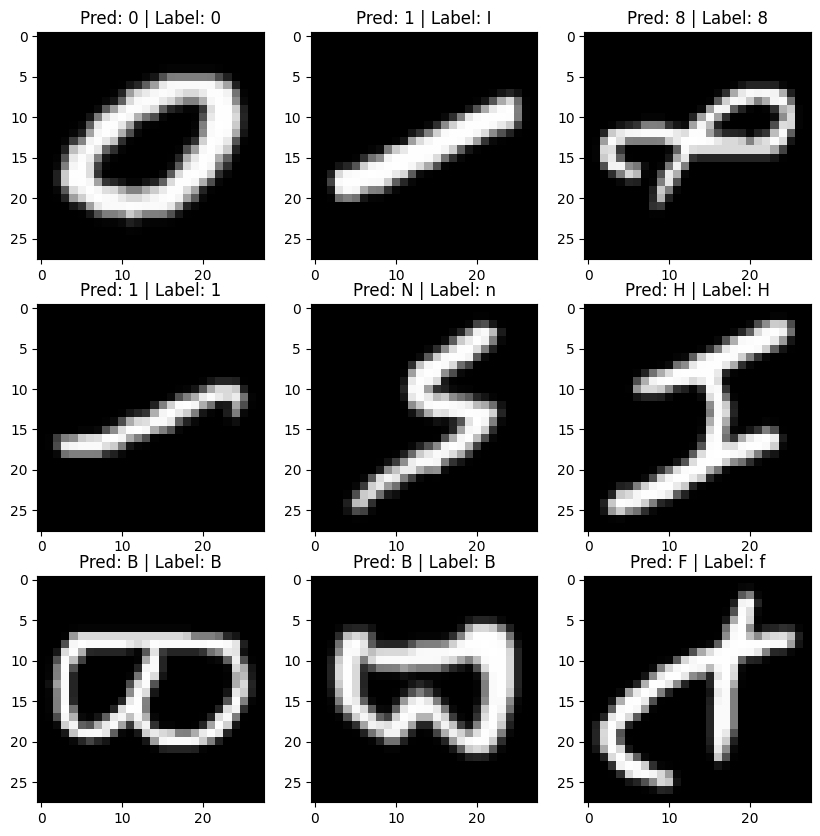

In [ ]:
plt.figure(figsize=(10, 10))
for i , sample in enumerate(test_sample):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.title(f"Pred: {class_names[pred_classes[i]]} | Label: {class_names[test_label[i]]}")


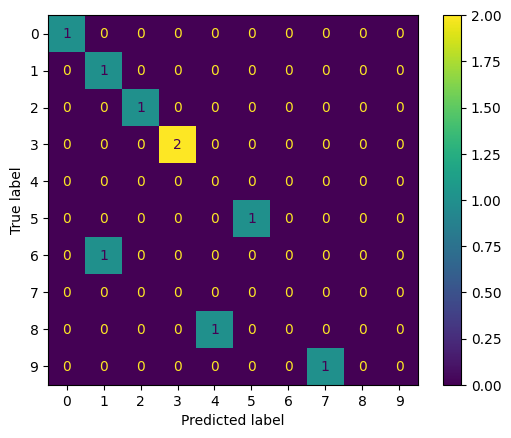

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(test_label, pred_classes)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
torch.save(model_2.state_dict(), "my_model_weights.pth")

model = EMNISTclassificationV3(input_num=1, hidden_layer=10, output_num=len(class_names)).to(device)
model.load_state_dict(torch.load("my_model_weights.pth", map_location=device))


<All keys matched successfully>